In [57]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

# Veri kümesinden sadece ilk birkaç sınıfı alıyoruz (veri seti çok büyükse)
max_classes = 10  # Örneğin, sadece ilk 10 sınıf
valid_classes = ['collie', 'dolphin', 'elephant', 'fox', 'moose', 'rabbit', 'sheep', 'squirrel', 'giant+panda', 'polar+bear']
nOfClasses = 10  # 10 sınıf olduğu için

In [58]:
valid_classes

['collie',
 'dolphin',
 'elephant',
 'fox',
 'moose',
 'rabbit',
 'sheep',
 'squirrel',
 'giant+panda',
 'polar+bear']

In [59]:
import os
images = []
classNames = []  # Sınıf adlarını buraya ekleyeceğiz
path = "/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages"

if os.path.exists(path):
    print("Dizin Mevcut")
else:
    print("Belirtilen dizin mevcut değil!")

Dizin Mevcut


In [60]:
# Geçerli sınıfların listesini almak
for subdirname in valid_classes[:max_classes]:  # İlk max_classes kadar sınıf
    subdir_path = os.path.join(path, subdirname)
    if os.path.isdir(subdir_path):  # Sadece geçerli sınıf dizinlerini işliyoruz
        myImageList = os.listdir(subdir_path)
        
        # Her sınıftan yalnızca ilk 650 resmi alıyoruz
        for j in myImageList[:650]:  # Sadece ilk 650 resmi al
            img = cv2.imread(os.path.join(subdir_path, j))
            if img is not None:  # Boş resimleri kontrol et
                img = cv2.resize(img, (64, 64))  
                images.append(img)
                classNames.append(subdirname)  # Resmin etiketini (sınıf adını) ekliyoruz



Bu kodun amacı bir veri kümesinden, belirli sayıda sınıfa ait görselleri okuyarak işlemek ve bu görselleri bir listeye eklemek

In [61]:
images = np.array(images)
classNames = np.array(classNames)
print(f"images shape: {images.shape}")
print(f"classNames shape: {classNames.shape}")

images shape: (6500, 64, 64, 3)
classNames shape: (6500,)


np.array metodunun yapılma amacı:
-Hızlı ve verimli veri işleme sağlar.
-Sayısal işlemleri kolaylaştırır.
-Derin öğrenme modelleri ve makine öğrenimi algoritmaları için uygun hale getirir.
-Verilerle yapılan manipülasyonları daha verimli hale getirir.

In [62]:
# Eğitim, test ve validasyon setlerini ayarlıyoruz
x_train, x_test, y_train, y_test = train_test_split(images, classNames, test_size=0.3, random_state=42, stratify=classNames)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.3, random_state=42, stratify=y_train)


Bu kod, veri kümesini (images) eğitim, doğrulama ve test setlerine bölmek için train_test_split fonksiyonunu kullanır.
train_test_split
Bu fonksiyon, verileri rastgele bir şekilde iki veya daha fazla sete böler. Genellikle eğitim, doğrulama ve test verileri elde etmek için kullanılır. train_test_split fonksiyonu aşağıdaki parametreleri alır:

images (ilk parametre):

Bu, özellikler (features) kümesidir. Burada her bir öğe, örneğin, resim verisi olabilir.
classNames (ikinci parametre):

Bu, etiketlerin (labels) bulunduğu veri kümesidir. Yani her bir resmin sınıfını belirten bir dizi.
test_size=0.3:

Test setinin boyutunu belirler. Burada 0.3, verinin %30'unun test setine ayrılacağı anlamına gelir. Kalan %70'i eğitim seti olarak kullanılacaktır.
Eğer test verisinin oranını değiştirmek isterseniz, bu değeri değiştirebilirsiniz (örneğin test_size=0.2 ile test seti %20 olur).

random_state=42:
Veri kümesinin nasıl bölüneceğini belirleyen rastgelelikyi kontrol etmek için bir sayı kullanılır. Sabit bir random_state değeri belirlemek, her çalıştırmada aynı sonuçları almanızı sağlar.
Eğer random_state belirtilmezse, her çalıştırmada farklı bir şekilde veri kümesi bölünür.
Bu değer sadece bölme işlemi sırasında tutarlılığı sağlamak içindir.
stratify=classNames:

Bu parametre, veri kümesinin sınıf dağılımını korumak için kullanılır. Yani, sınıflar arasında dengesiz bir dağılım olsa bile, eğitim, doğrulama ve test setlerinde her sınıfın aynı oranda bulunmasını sağlar.
Burada classNames, etiketlerin bulunduğu dizi olduğundan, her sınıfın orantılı bir şekilde veri setlerine dağılmasını sağlar.



İkinci train_test_split fonksiyonu ise eğitim setini ve doğrulama setini ayırmak için kullanılır:
Bu parametreler şunları ifade eder:

x_train ve y_train:

Bu, daha önce eğitim için ayrılmış olan veri ve etiketlerdir. train_test_split burada eğitim verilerini (x_train) ve etiketlerini (y_train) kullanır.
test_size=0.3:

Burada doğrulama setinin boyutunu belirler. Yani, eğitim verisinin %30'u doğrulama seti olarak ayrılacak. Kalan %70'i eğitim seti olarak kalacaktır.
random_state=42:

Yine aynı şekilde, veri kümesinin bölünmesinde rastgelelikyi kontrol etmek için kullanılır.
stratify=y_train:

Eğitim setindeki sınıf dengesinin doğrulama setinde de korunmasını sağlar. Yani, her sınıfın doğrulama setindeki oranı eğitim setindeki ile aynı olacaktır.

In [63]:
def get_wb_images(img):
    
    # Ortalama RGB değerlerini hesapla
    mean_b = np.mean(img[:, :, 0])  # Blue kanal ortalaması
    mean_g = np.mean(img[:, :, 1])  # Green kanal ortalaması
    mean_r = np.mean(img[:, :, 2])  # Red kanal ortalaması

    # Ortalama değerlerin global ortalamasını hesapla
    mean_gray = (mean_b + mean_g + mean_r) / 3

    # Kanalları yeniden ölçekle
    scale_b = mean_gray / mean_b
    scale_g = mean_gray / mean_g
    scale_r = mean_gray / mean_r

    # Kanalları yeniden dengele
    img[:, :, 0] = np.clip(img[:, :, 0] * scale_b, 0, 255)
    img[:, :, 1] = np.clip(img[:, :, 1] * scale_g, 0, 255)
    img[:, :, 2] = np.clip(img[:, :, 2] * scale_r, 0, 255)

    return img.astype(np.uint8)  

Gray World algoritmasını uygulayarak renk sabitliği sağlar.

In [64]:
# normalizasyon yapıyoruz
def preProcess(img):
    img = cv2.resize(img, (64, 64))
    img = img/ 255.0
    return img

Resim üzerinde normalizasyon işlemleri gerçekleştirilir

In [65]:
def save_manipulated_images(images, output_dir, base_filename="image"):
    # Çıktı dizini oluşturulmamışsa, oluştur
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Resimleri kaydetme
    for i, img in enumerate(images):
        # Resmi kaydetmek için dosya ismi oluştur
        filename = f"{base_filename}_{i+1}.png"  # veya .jpg uzantısı
        filepath = os.path.join(output_dir, filename)
        cv2.imwrite(filepath, img)
        print(f"Saved: {filepath}")


save_manipulated_images fonskiyonu, verilen images listesindeki her bir resmi belirtilen output_dir dizinine kaydeder. Eğer çıktı dizini mevcut değilse, fonksiyon önce dizini oluşturur. Her resim için bir dosya adı oluşturulur ve bu adla resim png formatında kaydedilir. Her kaydedilen resim için dosya yolu ekrana yazdırılır, böylece kaydetme işleminin başarıyla gerçekleştiği bilgisi sağlanır.

In [66]:
def get_manipulated_images(img):
    manipulated_images = []
    # İstediğiniz alpha ve beta kombinasyonlarını seçin
    selected_combinations = [(1.0, 50), (1.5, -50)]  # Max 2 kombinasyon

    for alpha, beta in selected_combinations:
        manipulated_img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
        manipulated_images.append(manipulated_img)
    
    return manipulated_images
manipulated_test_images=[]
output_dir = "/kaggle/working/manipulated_test_images_grayWorld3"

Bu fonksiyon, verilen bir resmi (img) belirli alpha (kontrast) ve beta (ışık düzeyi) değerleriyle manipüle eder. Fonksiyon, yalnızca iki seçili kombinasyon ((1.0, 50) ve (1.5, -50)) üzerinde işlem yapar. Her kombinasyon için cv2.convertScaleAbs() fonksiyonu kullanılarak resmin kontrastı ve parlaklığı ayarlanır, ardından işlenmiş resimler manipulated_images listesine eklenir. Sonuç olarak, bu fonksiyon orijinal resmi belirlenen iki farklı ayarla manipüle eder ve bunları döndüren bir liste oluşturur.

In [67]:
#for img in x_test:
    #wb_image = get_wb_images(img)
    ##manipulated_images = get_manipulated_images(img)  # get_wb_images yerine get_manipulated_images kullanıyoruz
    ##manipulated_test_images.extend(manipulated_images)
    #manipulated_test_images.append(wb_image)
    

Bu kod, x_test listesindeki her bir görsel için get_wb_images() fonksiyonunu çağırarak beyaz dengesi düzeltilmiş görselleri elde eder. Elde edilen her beyaz dengesi düzeltilmiş görsel, manipulated_test_images listesine eklenir. Yorum satırındaki extend() metodu ise, her seferinde birden fazla görseli listeye eklemek için kullanılabilir.

In [68]:
#save_manipulated_images(manipulated_test_images,output_dir)  

Bu kod, manipulated_test_images listesindeki tüm görselleri, belirtilen output_dir dizinine kaydeder. Her görsel, save_manipulated_images fonksiyonu ile belirtilen dizine resim adıyla birlikte yazılır.

In [69]:
x_train = np.array(list(map(preProcess, x_train)))
x_test = np.array(list(map(preProcess, x_test)))
x_validation = np.array(list(map(preProcess, x_validation)))

Bu kod, x_train, x_test ve x_validation veri setlerindeki her bir görseli preProcess fonksiyonu ile işleyerek ön işler. map(preProcess, ...) fonksiyonu, her veri setindeki görselleri sırasıyla preProcess fonksiyonuna uygular. Sonuç olarak, her veri seti NumPy dizisine dönüştürülerek işlenmiş görselleri içerir.

In [70]:
# Veriyi artırma (Data augmentation)
dataGen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             rotation_range=30,
                             shear_range=0.2,
                             horizontal_flip=True,
                             fill_mode="nearest")
dataGen.fit(x_train)


Bu kod, veri artırma (data augmentation) işlemi için bir ImageDataGenerator nesnesi oluşturur. Görseller üzerinde rastgele genişlik ve yükseklik kayması, zoom, döndürme, yırtılma, yatay çevirme gibi işlemleri uygular ve bu sayede eğitim verisini artırarak modelin genelleme yeteneğini iyileştirir. dataGen.fit(x_train) ise, artırma işleminin x_train verisine uygulanabilmesi için gerekli parametreleri öğrenir.

In [71]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_validation_encoded = label_encoder.transform(y_validation)

# 2. Etiketleri kategorik formata çeviriyoruz (one-hot encoding)
y_train = to_categorical(y_train_encoded, nOfClasses)
y_test = to_categorical(y_test_encoded, nOfClasses)
y_validation = to_categorical(y_validation_encoded, nOfClasses)


Bu kod, etiketleri sayısal formatta kodlamak için önce LabelEncoder kullanır. fit_transform() fonksiyonu, y_train etiketlerini sayısal değerlere dönüştürürken, transform() fonksiyonu y_test ve y_validation etiketlerini aynı şekilde dönüştürür. Ardından, to_categorical() fonksiyonu, sayısal etiketleri one-hot encoding formatına çevirir, yani her etiket için bir vektör oluşturur ve her vektörde doğru sınıfın karşılık geldiği konumda 1, diğerlerinde 0 olur. Bu işlem, modelin kategorik sınıflandırma yapabilmesi için gereklidir

In [72]:
# Modeli oluşturuyoruz
model = Sequential()

# İlk konvolüsyonel katman
model.add(Conv2D(input_shape=(64, 64, 3), filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# İkinci konvolüsyonel katman
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten katmanı
model.add(Flatten())

# Fully Connected (Dense) katman
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.3))  # Dropout kullanmak overfitting'i azaltabilir

# Çıktı katmanı
model.add(Dense(units=nOfClasses, activation="softmax"))

# Modeli derlemek
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
model.save("/kaggle/working/my_model10.h5")
print("Model Kaydedildi")

Model Kaydedildi


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Bu kod, bir Convolutional Neural Network (CNN) modeli oluşturur. Aşağıda her adım açıklanmıştır:

Model Oluşumu: Sequential() ile bir model başlatılır, bu model sırasıyla katmanlar eklemeye olanak tanır.

İlk Konvolüsyonel Katman: Conv2D katmanı, 64x64 boyutunda ve 3 renk kanalına sahip (RGB) giriş görsellerini işlemek için 32 adet 3x3 filtre kullanır. ReLU aktivasyon fonksiyonu uygulanır ve "same" padding ile çıktı boyutu girişle aynı tutulur. Ardından MaxPooling2D katmanı ile 2x2 boyutunda havuzlama yapılır.

İkinci Konvolüsyonel Katman: Aynı yapıdaki bir konvolüsyonel katman, 64 adet 3x3 filtre kullanarak daha derin özellikler çıkarır ve yine 2x2 havuzlama yapılır.

Flatten Katmanı: Bu katman, 2D çıkışı düzleştirerek (flatten) tam bağlantılı (dense) katmanlar için uygun hale getirir.

Fully Connected (Dense) Katman: 128 nöronlu bir tam bağlantılı katman eklenir ve ReLU aktivasyon fonksiyonu uygulanır. Ayrıca, Dropout katmanı ile %30 oranında rastgele nöronlar kapatılır, bu da aşırı uyum (overfitting) riskini azaltmaya yardımcı olur.

Çıktı Katmanı: Çıkış katmanı, sınıflandırma problemleri için nOfClasses kadar nörona sahip olup, her sınıf için olasılık verir ve softmax aktivasyon fonksiyonu kullanır.

Modeli Derleme: Model, categorical_crossentropy kayıp fonksiyonu ve Adam optimizasyon algoritması ile derlenir. accuracy metriği, modelin doğruluğunu izlemek için eklenir.

Modeli Kaydetme: Model, my_model10.h5 adıyla belirtilen dizine kaydedilir ve "Model Kaydedildi" mesajı yazdırılır.

Bu model, görüntü sınıflandırma görevlerinde kullanılabilecek bir CNN yapısıdır.

In [73]:
# Eğitim süresi ve batch size
batch_size = 64
epochs = 20  # Epoch sayısını azaltıyoruz

# Modeli eğitiyoruz
hist = model.fit(dataGen.flow(x_train, y_train, batch_size=batch_size),
                 validation_data=(x_validation, y_validation),
                 epochs=epochs, steps_per_epoch=x_train.shape[0] // batch_size, shuffle=True)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 288ms/step - accuracy: 0.1589 - loss: 2.2200 - val_accuracy: 0.3524 - val_loss: 1.8928
Epoch 2/20
 1/49 ━━━━━━━━━━━━━━━━━━━━ 11s 242ms/step - accuracy: 0.2812 - loss: 1.9706

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.2812 - loss: 1.9706 - val_accuracy: 0.3429 - val_loss: 1.8861
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 295ms/step - accuracy: 0.3068 - loss: 1.9215 - val_accuracy: 0.3956 - val_loss: 1.7116
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3438 - loss: 1.7578 - val_accuracy: 0.3861 - val_loss: 1.7312
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 281ms/step - accuracy: 0.3443 - loss: 1.8083 - val_accuracy: 0.3993 - val_loss: 1.7176
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3594 - loss: 1.8543 - val_accuracy: 0.3780 - val_loss: 1.7678
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 292ms/step - accuracy: 0.3932 - loss: 1.7058 - val_accuracy: 0.4813 - val_loss: 1.5085
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3750 - loss: 1.9304 - val_accuracy: 0.4659 - val_loss: 1.5215
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 281ms/step - accuracy: 0.4276 - loss: 1.6454 - val_accuracy: 0.5018 - val_


Bu kod, oluşturulan CNN modelini eğitim verisiyle eğitirken kullanılan parametreler ve süreç hakkında bilgi verir:

Eğitim Parametreleri:

batch_size = 64: Eğitim sırasında her adımda 64 görsel kullanılır. Yani model, her 64 görselle bir güncelleme yapar.
epochs = 20: Model, tüm eğitim verisi üzerinde toplam 20 kez çalışacak (epoch). Bu, modelin öğrenme sürecinin kaç kez tekrar edileceğini belirler.
Model Eğitimi: model.fit() fonksiyonu, modelin eğitilmesini başlatır. Parametreler şu şekilde:

dataGen.flow(x_train, y_train, batch_size=batch_size): Bu, veri artırma (data augmentation) işlemiyle eğitim verilerini döngüsel olarak sağlayan bir veri jeneratörüdür. x_train ve y_train, eğitim görselleri ve etiketlerini içerir.
validation_data=(x_validation, y_validation): Bu, modelin her epoch'tan sonra doğrulama (validation) verisi üzerinde performansını değerlendirip iyileştirmeler yapabilmesi için doğrulama verilerini sağlar.
epochs=epochs: Modelin eğitim verisi üzerinde kaç kez çalışacağı, burada 20 epoch ile sınırlıdır.
steps_per_epoch=x_train.shape[0] // batch_size: Her epoch'ta kaç adım (iteration) yapılacağını belirtir. Eğitim veri setinin toplam görsel sayısı (x_train.shape[0]) batch size'a bölünerek her epoch için kaç adım yapılacağı hesaplanır.
shuffle=True: Eğitim verisi her epoch başında karıştırılır, böylece model verinin sırasına bağlı kalmaz ve genelleme yeteneği artar.
Eğitim süreci, modelin doğruluğunu her epoch sonunda izler ve eğitim boyunca ağırlıkları günceller. Bu süreç, eğitim ve doğrulama hatalarını takip ederek modelin performansını iyileştirir.

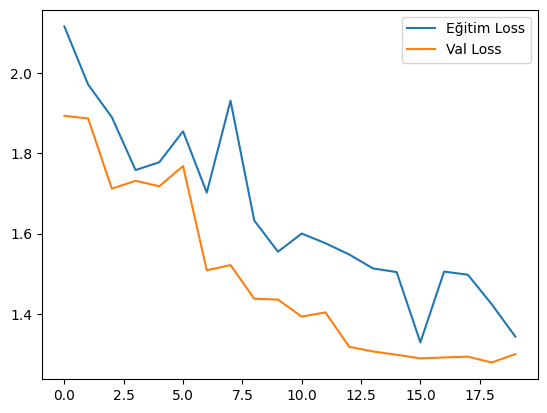

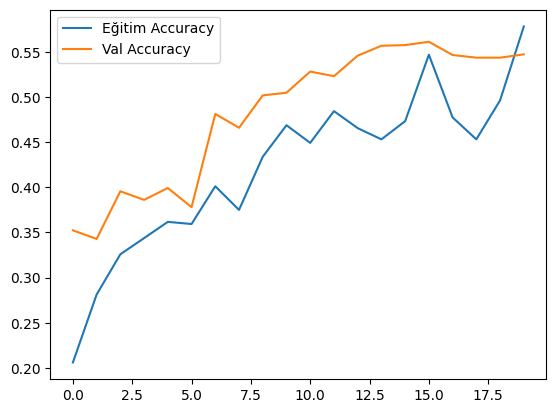

In [74]:
# Eğitim ve validasyon kaybı grafiklerini çiziyoruz
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim Accuracy")
plt.plot(hist.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.show()


İlk grafik, modelin eğitim sürecindeki kayıp (loss) değerlerini ve doğrulama kaybını (val_loss) karşılaştırarak modelin performansını gösterir. İkinci grafik ise eğitim doğruluğu (accuracy) ve doğrulama doğruluğunu (val_accuracy) göstererek modelin başarısını her epoch'ta nasıl geliştirdiğini görselleştirir.

In [75]:
# Test verisi ile modelin başarısını değerlendiriyoruz
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5298 - loss: 1.3268
Test loss: 1.296411156654358
Test accuracy: 0.5451282262802124


Bu kod, modelin test verisi üzerinde performansını değerlendirir:

Model Değerlendirmesi: model.evaluate(x_test, y_test, verbose=1) fonksiyonu, test verisi (x_test) ve test etiketleri (y_test) üzerinde modelin kayıp (loss) ve doğruluk (accuracy) gibi metriklerini hesaplar. verbose=1 parametresi, değerlendirme sürecini ekranda görsel olarak takip etmeyi sağlar.

Sonuçları Yazdırma: score[0] kayıp (loss) değerini, score[1] ise doğruluk (accuracy) değerini temsil eder. Bu değerler, modelin test verisi üzerindeki başarısını gösterir ve ekrana yazdırılır.